In [1]:
#Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Predictive models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import classification_report

In [2]:
data = pd.read_excel('workinput.xlsx')

# Display the first few rows of the dataset to understand its structure
data.head()

,caseid,surv72,mnrosc,time,EtCO2,age_yrs,sexp,witbys,frhyem_shock,bystander_cpr,bystander_aed,last_succ_air_rev,locpub,whitep,blackp,other
0,10267,0,0,-15,21.291667,91.0,0,0.0,Non-Shockable,0,0,LT,0,0,1,0
1,10267,0,0,-14,23.713542,91.0,0,0.0,Non-Shockable,0,0,LT,0,0,1,0
2,10267,0,0,-13,19.217773,91.0,0,0.0,Non-Shockable,0,0,LT,0,0,1,0
3,10267,0,0,-12,NaN,91.0,0,0.0,Non-Shockable,0,0,LT,0,0,1,0
4,10267,0,0,-11,34.131836,91.0,0,0.0,Non-Shockable,0,0,LT,0,0,1,0


In [3]:
data.describe()

,caseid,surv72,mnrosc,time,EtCO2,age_yrs,sexp,witbys,bystander_cpr,bystander_aed,locpub,whitep,blackp,other
count,17971.000000,17971.000000,17971.000000,17971.000000,13510.000000,17960.000000,17971.000000,16272.000000,17971.000000,17971.000000,17971.000000,17971.000000,17971.000000,17971.000000
mean,120008.477492,0.082911,0.150186,-7.818485,31.681762,62.505958,0.629403,0.518559,0.511046,0.115186,0.103834,0.539146,0.251850,0.211396
std,40319.211327,0.275756,0.357264,6.073506,20.130878,16.805798,0.483669,0.653672,0.499892,0.319255,0.306328,0.498479,0.434088,0.408310
min,10267.000000,0.000000,0.000000,-20.000000,0.405273,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90858.000000,0.000000,0.000000,-12.000000,15.987305,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,126823.000000,0.000000,0.000000,-7.000000,28.500000,64.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,154815.000000,0.000000,0.000000,-3.000000,42.927051,75.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,177413.000000,1.000000,1.000000,5.000000,164.000000,100.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000


In [5]:
data.isna().sum()

caseid                  0
surv72                  0
mnrosc                  0
time                    0
EtCO2                4461
age_yrs                11
sexp                    0
witbys               1699
frhyem_shock            0
bystander_cpr           0
bystander_aed           0
last_succ_air_rev     713
locpub                  0
whitep                  0
blackp                  0
other                   0
dtype: int64

In [9]:
data_reduced = data.drop(columns=['EtCO2', 'time'])

# Remove duplicate rows based on all remaining columns
data_unique = data_reduced.drop_duplicates()

# List of categorical columns (adapt this list as needed for your dataset)
categorical_columns = ['sexp', 'frhyem_shock', 'witbys', 'bystander_cpr', 'bystander_aed', 'last_succ_air_rev', 'locpub', 'whitep', 'blackp', 'other']

# Calculate the distribution for each categorical column
categorical_distributions = {}
for column in categorical_columns:
    distribution = data_unique[column].value_counts()
    categorical_distributions[column] = distribution
    print(f"Distribution for {column}:\n{distribution}\n")

Distribution for sexp:
sexp
1    726
0    445
2      1
Name: count, dtype: int64

Distribution for frhyem_shock:
frhyem_shock
Non-Shockable    988
Shockable        184
Name: count, dtype: int64

Distribution for witbys:
witbys
0.0    607
1.0    343
2.0    109
Name: count, dtype: int64

Distribution for bystander_cpr:
bystander_cpr
1    590
0    582
Name: count, dtype: int64

Distribution for bystander_aed:
bystander_aed
0    1043
1     129
Name: count, dtype: int64

Distribution for last_succ_air_rev:
last_succ_air_rev
LT     818
ETI    295
Name: count, dtype: int64

Distribution for locpub:
locpub
0    1049
1     122
2       1
Name: count, dtype: int64

Distribution for whitep:
whitep
1    625
0    547
Name: count, dtype: int64

Distribution for blackp:
blackp
0    877
1    295
Name: count, dtype: int64

Distribution for other:
other
0    916
1    256
Name: count, dtype: int64



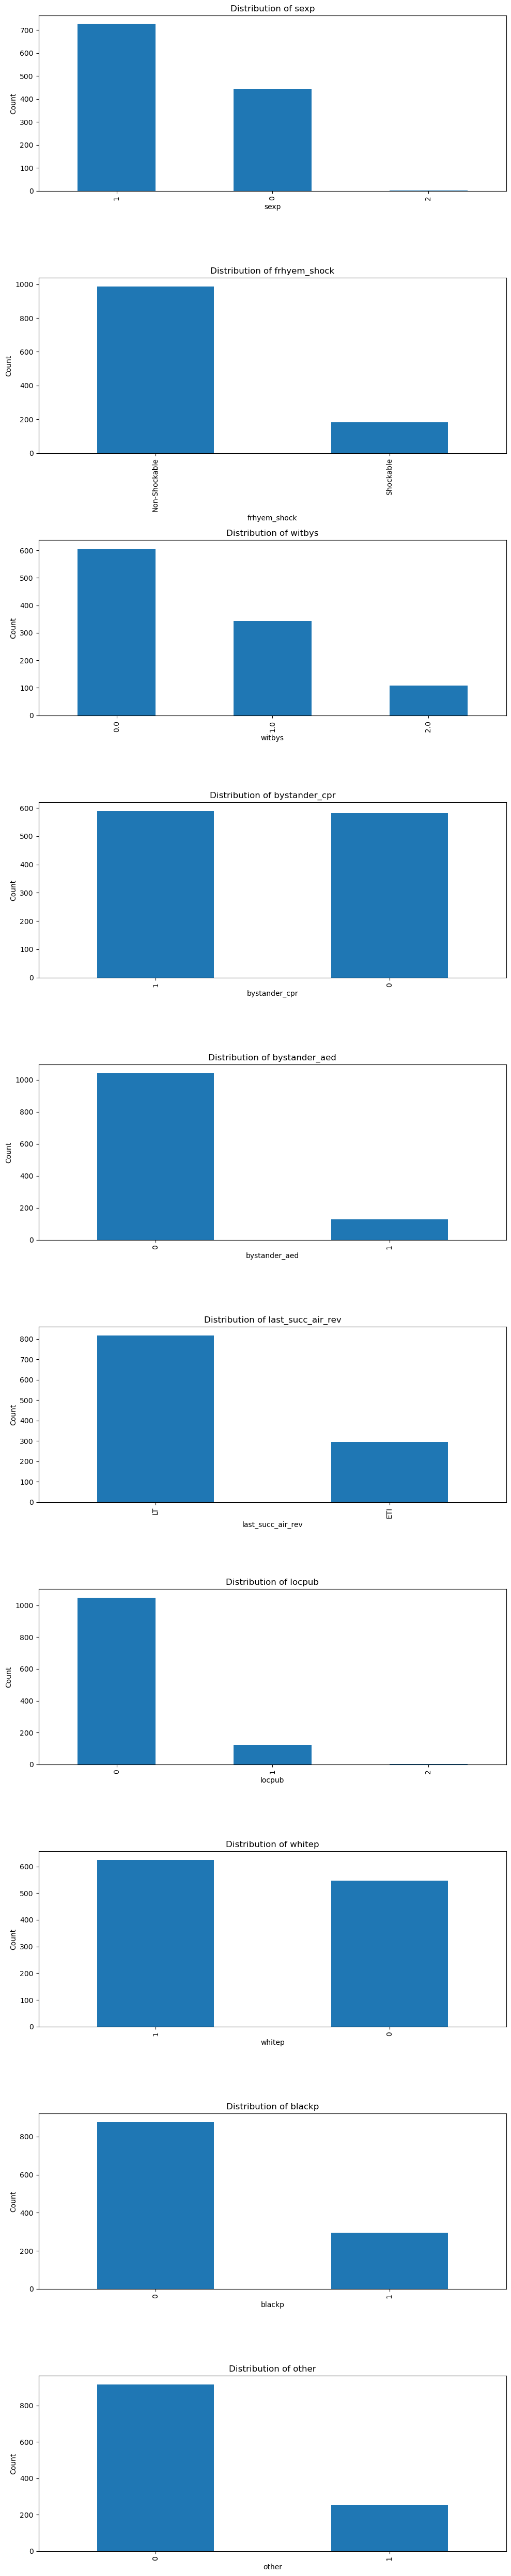

In [10]:

# Plotting
fig, axes = plt.subplots(nrows=len(categorical_columns), figsize=(10, 5 * len(categorical_columns)))
for i, (column, distribution) in enumerate(categorical_distributions.items()):
    # If there's only one plot, 'axes' is not an array
    if len(categorical_columns) == 1:
        ax = axes
    else:
        ax = axes[i]
    distribution.plot(kind='bar', ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

count    1171.000000
mean       62.377455
std        17.032326
min        18.000000
25%        52.000000
50%        64.000000
75%        75.000000
max       100.000000
Name: age_yrs, dtype: float64


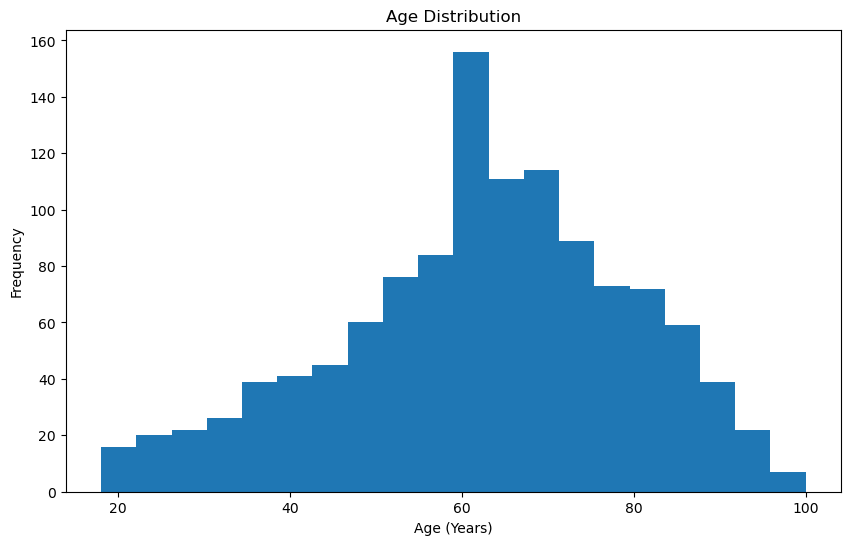

In [11]:
# Calculate descriptive statistics
age_descriptive_stats = data_unique['age_yrs'].describe()

# Print descriptive statistics
print(age_descriptive_stats)

# Determine the bin width
min_age = age_descriptive_stats['min']
max_age = age_descriptive_stats['max']
bin_width = (max_age - min_age) / 20  # For 20 bins

# Create a histogram for the age distribution
plt.figure(figsize=(10, 6))
data_unique['age_yrs'].hist(bins=20)  # You can adjust the number of bins as necessary
plt.title('Age Distribution')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.grid(False)  # Turn off the grid if preferred
plt.show()



               Column  MissingValues
0              caseid              0
1              surv72              0
2              mnrosc              0
3                time              0
4               EtCO2           4461
5             age_yrs             11
6                sexp              0
7              witbys           1699
8        frhyem_shock              0
9       bystander_cpr              0
10      bystander_aed              0
11  last_succ_air_rev            713
12             locpub              0
13             whitep              0
14             blackp              0
15              other              0


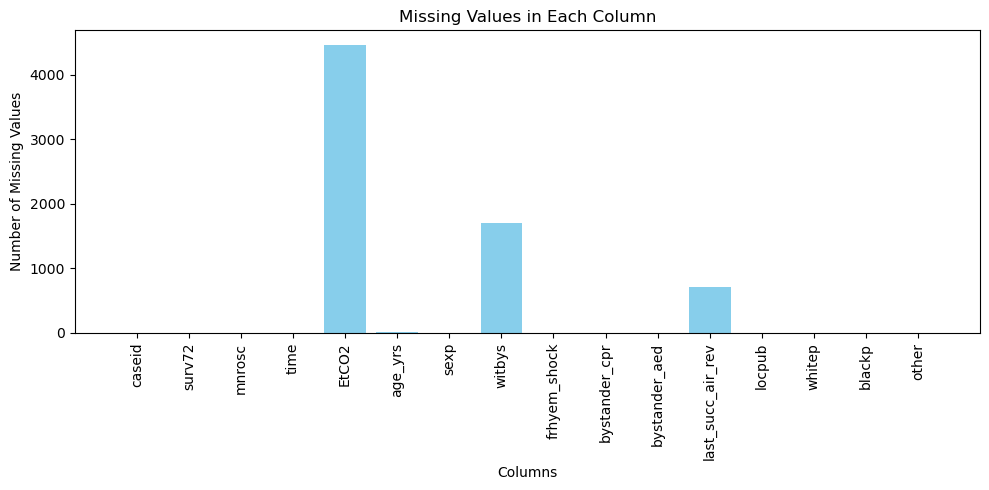

In [12]:
# Calculate the number of missing values for each column
missing_values_count = data.isnull().sum()

# Convert to DataFrame for better display
missing_values_count_df = missing_values_count.reset_index()
missing_values_count_df.columns = ['Column', 'MissingValues']

# Print the missing values count DataFrame
print(missing_values_count_df)

# Plotting the missing values
plt.figure(figsize=(10, 5))
plt.bar(missing_values_count_df['Column'], missing_values_count_df['MissingValues'], color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)  # Rotate the column names for better readability
plt.title('Missing Values in Each Column')
plt.tight_layout()  # Adjust the layout to fit the x labels
plt.show()


## Slope Calculation

In [13]:
# Replace NaN values with 0 in the 'witbys' column
data['witbys'].fillna(0, inplace=True)

# Verify that the NaN values have been replaced
nan_count_witbys = data['witbys'].isnull().sum()
print(f"Number of NaN values in 'witbys' after replacement: {nan_count_witbys}")

Number of NaN values in 'witbys' after replacement: 0


In [14]:
def calculate_slope(df):
    slopes = {}

    for case_id, group in df.groupby('caseid'):
        # Drop rows where either 'time' or 'EtCO2' is NaN to ensure clean data for polyfit
        clean_group = group.dropna(subset=['time', 'EtCO2'])

        # Check if we have at least two points to calculate a slope
        if len(clean_group) >= 2:
            time = clean_group['time'].values
            etco2 = clean_group['EtCO2'].values
            slope, intercept = np.polyfit(time, etco2, 1)
            slopes[case_id] = slope
        else:
            slopes[case_id] = np.nan # Assign NaN if we can't calculate a slope

    # Convert the slopes dictionary to a DataFrame
    slopes_df = pd.DataFrame(list(slopes.items()), columns=['caseid', 'EtCO2_slope'])

    return slopes_df

# Assume 'data' is your DataFrame
slopes_df = calculate_slope(data)

# Now, 'slopes_df' contains the slopes of EtCO2 vs. time for each caseid
# You can save this DataFrame as a CSV file
slopes_df.to_csv('etco2_slopes_no_interpolation.csv', index=False)

print("Slopes DataFrame saved to 'etco2_slopes.csv'.")

Slopes DataFrame saved to 'etco2_slopes.csv'.
